In [3]:
Nmax =1; Nmin = 0;N_step=1
S = 1/2; I1 = 0; I2 = 1/2; 
cmIn2MHz = 0.0299792*10**6

# BaF 138 parameters
gamma = 80.923
BN=6473.9586572
DN=0.0055296816
bBa = 2301; cBa = 75; bFBa = bBa + cBa/3;
bF = 63.509; cF = 8.224; bFF = bF + cF/3;
I1=0
eq0Q=0

gS = 2.00197; gI2 = 5.258; gI1 =0.94/1.5; grot = -0.048; gl = -0.00594 ;
uB = 1.399624604 # MHz/G
uN =uB/1836;

In [4]:
import numpy as np
from sympy.physics.wigner import wigner_6j,wigner_9j,wigner_3j,clebsch_gordan
from numpy import linalg as LA

def kdel(x,y):
    if x==y:
        return 1
    else:
        return 0
def reduced(x):
    return np.sqrt(x*(x+1)*(2*x+1))
def nreduced(x,y):
    return np.sqrt((2*x+1)*(2*y+1))

def HN(state):
    (G,N,F1,F,mF,Gp,Np,F1p,Fp,mFp)=state
    return kdel(mF,mFp)*kdel(F,Fp)*kdel(F1,F1p)*kdel(N,Np)*kdel(G,Gp)*(BN*N*(N+1)-DN*N**2*(N+1)**2)

def HNS(state):
    (G,N,F1,F,mF,Gp,Np,F1p,Fp,mFp)=state
    return (gamma*kdel(mF,mFp)*kdel(F,Fp)*kdel(F1,F1p)*kdel(N,Np)*reduced(N)*reduced(S)*nreduced(G,Gp)*(-1)**(F1+I1+N+S+1+Gp+Gp)
            *wigner_6j(Np,Gp,F1,G,N,1)*wigner_6j(S,Gp,I1,G,S,1))

def HFBa(state):
    (G,N,F1,F,mF,Gp,Np,F1p,Fp,mFp)=state
    return bFBa/2*kdel(mF,mFp)*kdel(F,Fp)*kdel(F1,F1p)*kdel(N,Np)*kdel(G,Gp)*(G*(G+1)-S*(S+1)-I1*(I1+1))

def HCBa(state): #checked
    (G,N,F1,F,mF,Gp,Np,F1p,Fp,mFp)=state
    val=0.0
    for J in np.arange(np.abs(N-S),N+S+1):
        for Jp in np.arange(np.abs(Np-S),Np+S+1):
            val += ((-1)**(G+Gp+S+S+I1+I1+Jp+F1+I1+N)*nreduced(J,Jp)**2*wigner_6j(F1,G,N,S,J,I1)*wigner_6j(F1p,Gp,Np,S,Jp,I1)*
                    wigner_6j(I1,Jp,F1,J,I1,1)*wigner_9j(J,Jp,1,N,Np,2,S,S,1))
    return (-cBa*np.sqrt(30)/3*kdel(mF,mFp)*kdel(F,Fp)*kdel(F1,F1p)*reduced(I1)*reduced(S)*nreduced(G,Gp)*
            nreduced(N,Np)*wigner_3j(N,2,Np,0,0,0)*val)

def HQ(state): #checked
    (G,N,F1,F,mF,Gp,Np,F1p,Fp,mFp)=state
    val=0
    for J in np.arange(np.abs(N-S),N+S+1):
        for Jp in np.arange(np.abs(Np-S),Np+S+1):
            val += ((-1)**(G+Gp+S+I1+S+I1+Jp+F1+I1+S+Jp)*nreduced(J,Jp)**2*wigner_6j(F1,G,N,S,J,I1)*wigner_6j(F1p,Gp,Np,S,Jp,I1)*
                    wigner_6j(I1,Jp,F1,J,I1,2)*wigner_6j(Np,Jp,S,J,N,2))
    if wigner_3j(I1,2,I1,-I1,0,I1) != 0:
        return (eq0Q/4*kdel(mF,mFp)*kdel(F,Fp)*kdel(F1,F1p)*nreduced(G,Gp)*nreduced(N,Np)*
                wigner_3j(N,2,Np,0,0,0)*1/(wigner_3j(I1,2,I1,-I1,0,I1))*val)
    else:
        return 0

def HFF(state): #checked
    (G,N,F1,F,mF,Gp,Np,F1p,Fp,mFp)=state
    return (bFF*kdel(mF,mFp)*kdel(F,Fp)*kdel(N,Np)*(-1)**(F+I2+N+G+Gp+I1+S+F1p+F1p)*nreduced(G,Gp)*nreduced(F1,F1p)*reduced(I2)*
            reduced(S)*wigner_6j(I2,F1p,F,F1,I2,1)*wigner_6j(Gp,F1p,N,F1,G,1)*wigner_6j(S,Gp,I1,G,S,1))

def HCF(state): #updated
    (G,N,F1,F,mF,Gp,Np,F1p,Fp,mFp)=state
    val=0
    for J in np.arange(np.abs(N-S),N+S+1):
        for Jp in np.arange(np.abs(Np-S),Np+S+1):
            val += ((-1)**(G+Gp+S+S+I1+I1+F1p+F1p+F+I2+I1+1+N+J)*nreduced(J,Jp)**2*wigner_6j(F1,G,N,S,J,I1)*wigner_6j(F1p,Gp,Np,S,Jp,I1)
                    *wigner_6j(I2,F1p,F,F1,I2,1)*wigner_6j(Jp,F1p,I1,F1,J,1)*wigner_9j(J,Jp,1,N,Np,2,S,S,1))
    return (-cF*np.sqrt(30)/3*kdel(mF,mFp)*kdel(F,Fp)*reduced(I2)*reduced(S)*nreduced(G,Gp)*
            nreduced(N,Np)*nreduced(F1,F1p)*wigner_3j(N,2,Np,0,0,0)*val)

def HgrZS(state): #checked
    (G,N,F1,F,mF,Gp,Np,F1p,Fp,mFp)=state
    return (gS*uB*(-1)**(F-mF)*wigner_3j(F,1,Fp,-mF,0,mFp)*(-1)**(Fp+I2+F1+1)*nreduced(F,Fp)*nreduced(F1,F1p)*nreduced(G,Gp)*
            (-1)**(F1p+N+G+1)*kdel(N,Np)*wigner_6j(F1p,Fp,I2,F,F1,1)*wigner_6j(Gp,F1p,N,F1,G,1)*(-1)**(Gp+I1+S+1)*
            wigner_6j(S,Gp,I1,G,S,1)*reduced(S))

def HgrZI1(state): #checked
    (G,N,F1,F,mF,Gp,Np,F1p,Fp,mFp)=state
    return (-gI1*uN*(-1)**(F-mF)*wigner_3j(F,1,Fp,-mF,0,mFp)*(-1)**(Fp+I2+F1+1)*nreduced(F,Fp)*nreduced(F1,F1p)*nreduced(G,Gp)*
            (-1)**(F1p+N+G+1)*kdel(N,Np)*wigner_6j(F1p,Fp,I2,F,F1,1)*wigner_6j(Gp,F1p,N,F1,G,1)*(-1)**(G+I1+S+1)*
            wigner_6j(I1,Gp,S,G,I1,1)*reduced(I1))

def HgrZI2(state): #checked
    (G,N,F1,F,mF,Gp,Np,F1p,Fp,mFp)=state
    return (-gI2*uN*(-1)**(F-mF)*wigner_3j(F,1,Fp,-mF,0,mFp)*(-1)**(F+I2+F1+1)*nreduced(F,Fp)*kdel(F1,F1p)*kdel(N,Np)*kdel(G,Gp)
            *wigner_6j(I2,Fp,F1,F,I2,1)*reduced(I2))

def HgrZN(state): #checked
    (G,N,F1,F,mF,Gp,Np,F1p,Fp,mFp)=state
    return (-grot*uN*(-1)**(F-mF)*wigner_3j(F,1,Fp,-mF,0,mFp)*(-1)**(Fp+I2+F1+1)*nreduced(F,Fp)*nreduced(F1,F1p)
            *wigner_6j(F1p,Fp,I2,F,F1,1)*kdel(G,Gp)*
            (-1)**(F1+Np+G+1)*wigner_6j(Np,F1p,G,F1,N,1)*reduced(N)*kdel(N,Np))

def HgrZgl(state): #updated
    (G,N,F1,F,mF,Gp,Np,F1p,Fp,mFp)=state
    val=0
    for J in np.arange(np.abs(N-S),N+S+1):
        for Jp in np.arange(np.abs(Np-S),Np+S+1):
            for sigma in np.arange(-S,S+1):
                for sigmap in np.arange(-S,S+1):
                    for q in [-1,1]: #includeing a 0 here and setting gl=gS, this hami should be same as the HZs hami, and it is
                        val += ((-1)**(G+Gp+S+I1+S+I1)*wigner_6j(F1,G,N,S,J,I1)*wigner_6j(F1p,Gp,Np,S,Jp,I1)*nreduced(J,Jp)**2
                                 *nreduced(G,Gp)*(-1)**(N-S+Np-S+sigma+sigmap)*nreduced(N,Np)*wigner_3j(J,S,N,sigma,-sigma,0)
                                 *wigner_3j(Jp,S,Np,sigmap,-sigmap,0)*(-1)**(F-mF)*wigner_3j(F,1,Fp,-mF,0,mFp)*
                                 (-1)**(Fp+I2+F1+1)*nreduced(F,Fp)*wigner_6j(F1p,Fp,I2,F,F1,1)*
                                 (-1)**(F1p+J+I1+1)*nreduced(F1,F1p)*wigner_6j(Jp,F1p,I1,F1,J,1)*
                                 (-1)**(J+S-2*sigma)*wigner_3j(J,1,Jp,-sigma,q,sigmap)*wigner_3j(S,1,S,-sigma,q,sigmap)
                                 *reduced(S))
    return val*gl*uB

def H_noB(state):
    return HN(state)+HNS(state)+HFBa(state)+HCBa(state)+HFF(state)+HCF(state)+HQ(state)
def H_justB(state):
    return HgrZS(state)+HgrZI1(state)+HgrZI2(state)+HgrZN(state)+HgrZgl(state)

The coupled  and the uncoupled basis are represented as $|S I_1 G N F_1 I_2 F m_F \rangle$ and  $|S m_S I_1 m_{I_1} N m_N I_2 m_{I_2}\rangle$ respectively. We want to be able to transform between them. The relavant Clebsch Gordon coefficiets for the transformation of the basis is given as,

\begin{align}
|S I_1 G N F_1 I_2 F m_F \rangle &= \sum_{m_{F_1}, m_{I_2}} \langle F_1 m_{F_1} I_2 m_{I_2}|F_1 I_2 F m_F \rangle |S I_1 G N F_1 m_{F_1} I_2 m_{I_2}\rangle \\
&= \sum_{m_{F_1}, m_{I_2}} \langle F_1 m_{F_1} I_2 m_{I_2}|F_1 I_2 F m_F \rangle 
\sum_{m_G, m_N} \langle G m_G N m_N|G N F_1 m_{F_1}\rangle |S I_1 G m_G N m_N I_2 m_{I_2}\rangle \\
&= \sum_{m_{F_1}, m_{I_2}} \langle F_1 m_{F_1} I_2 m_{I_2}|F_1 I_2 F m_F \rangle 
\sum_{m_G, m_N} \langle G m_G N m_N|G N F_1 m_{F_1}\rangle 
\sum_{m_S, m_{I_1}} \langle S m_S I_1 m_{I_1}|SI_1Gm_G\rangle
|Sm_S I_1m_{I_1}N m_N I_2 m_{I_2}\rangle \\
&= \sum_{m_S,m_{I_1},m_N,m_{I_2}} 
\left( \sum_{m_G,m_{F_1}}\langle F_1 m_{F_1} I_2 m_{I_2}|F_1 I_2 F m_F \rangle 
\langle G m_G N m_N|G N F_1 m_{F_1}\rangle
\langle S m_S I_1 m_{I_1}|SI_1Gm_G\rangle
\right)
|Sm_S I_1m_{I_1}N m_N I_2 m_{I_2}\rangle
\end{align}

If $v$ and $v'$ are the column vectors whose elements are the states in the coupled and the uncoupled basis respectively, the relation between them can given in terms of the transformation matrix $M$ as,
$$v = M v'$$
with the matrix elements
$$M_{i,i'} = \left( \sum_{m_G,m_{F_1}}\langle F_1 m_{F_1} I_2 m_{I_2}|F_1 I_2 F m_F \rangle 
\langle G m_G N m_N|G N F_1 m_{F_1}\rangle
\langle S m_S I_1 m_{I_1}|SI_1Gm_G\rangle
\right)
$$

Equivalently the transformation of a the column vectors written in the basis of the respective coupled (or the uncoupled) basis states is given as,
$$c_{coupled} = M c_{uncoupled}$$
which implies,
$$c_{uncoupled} = M^{T} c_{coupled}$$

In [5]:
#Construct coupled basis
myStates=[[0,0,0,0,0]];
for n in np.arange(Nmin,Nmax+1,N_step):
    for g in np.arange(np.abs(I1-S),I1+S+1):
        for f1 in np.arange(np.abs(n-g),n+g+1):
            for f in np.arange(np.abs(f1-I2),f1+I2+1):
                for mf in np.arange(-f,f+1):
                    myStates=np.append(myStates,[[g,n,f1,f,mf]],axis=0)
myStates=np.delete(myStates,0,axis=0)

#Construct the uncoupled basis
myStates_un = [[0,0,0,0,0,0,0,0]]
for ms in np.arange(-S,S+1):
    for mI1 in np.arange(-I1,I1+1):
        for N in np.arange(Nmin,Nmax+1,N_step):
            for mN in np.arange(-N,N+1):
                for mI2 in np.arange(-I2,I2+1):
                    myStates_un=np.append(myStates_un,[[S,ms,I1,mI1,N,mN,I2,mI2]],axis=0)
myStates_un=np.delete(myStates_un,0,axis=0)

#construct the transformation matrix
num=len(myStates_un)
def dot_basis_transform(myState,myState_un):
    (G,N,F1,F,mF) = myState
    (S,mS,I1,mI1,N_un,mN,I2,mI2) = myState_un
    val = 0
    for mG in np.arange(-G,G+1):
        for mF1 in np.arange(-F1,F1+1):
            val += kdel(N,N_un)*clebsch_gordan(F1,I2,F,mF1,mI2,mF)*clebsch_gordan(G,N,F1,mG,mN,mF1)*clebsch_gordan(S,I1,G,mS,mI1,mG)
    return val
            

M_transform=np.zeros([num,num])
for i in range(num):                                 ##### coupled basis
    for j in range(num):                             ##### uncoupled basis
        M_transform[i,j] = dot_basis_transform(myStates[i,:],myStates_un[j,:])

In [6]:
#Construct the Hamiltonian
H_0=np.zeros([len(myStates),len(myStates)])
H_B=np.zeros([len(myStates),len(myStates)])
for m in range(len(myStates)):
    for n in range(m+1):
        a=np.append(myStates[m,:],myStates[n,:])
        H_0[m,n]=H_noB(a)
        H_B[m,n]=H_justB(a)
        if m==n:
            H_0[m,n]=0.5*H_0[m,n]
            H_B[m,n]=0.5*H_B[m,n] 
H_0=H_0+np.transpose(H_0)
H_B=H_B+np.transpose(H_B)

In [38]:
fil=0
B_list=np.linspace(4600,4650,1000)
toWrite=np.zeros([1+len(myStates),len(B_list)])
col_count=0
for i in B_list:
    H=H_0+i*H_B
    w, v = LA.eig(H)
    N=1
    w=np.round(w,decimals=5)
    v=np.round(v,decimals=2)
    sorted_w=sorted(w)
    c=np.append(i,sorted_w)
    toWrite[:,col_count]=c
    col_count += 1
np.savetxt('test.csv',toWrite, delimiter=',', fmt='%10f') 

In [39]:
def matSort(M,index):
    """To sort the columns of a matrix in the order of the index provided"""
    m=len(index)
    C=np.zeros([m,m])
    for i in range(m):
        C[:,i]=M[:,index[i]]
    return C
sort_index = np.argsort(w)
sorted_w=sorted(w)
sorted_v=matSort(v,sort_index)

In [73]:
#View energy levels with the state composition just for the last value of the magnetic field

print("Energy in coupled basis")
print("------------------------")
for m in range(len(w)):
    n=-m-1
    rr=sorted_v[:,n]
    res = [idx for idx, val in enumerate(rr) if val != 0]
    print(sorted_w[n],end = " ; ")
    for i in res:
        if (i != res[-1]):
            print(rr[i],str(myStates[i,:]),end =" + " )
        else:
            print(rr[i],str(myStates[i,:]))
print()
print("Energy in uncoupled basis")
print("--------------------------")
#View energy levels with the state composition in uncoupled basis
for m in range(len(w)):
    n=-m-1
    rr=np.round(np.transpose(M_transform)@sorted_v[:,n],decimals=2)
    res = [idx for idx, val in enumerate(rr) if val != 0]
    print(sorted_w[n],end = " ; ")
    for i in res:
        if (i != res[-1]):
            print(rr[i],str(myStates_un[i,:]),end =" + " )
        else:
            print(rr[i],str(myStates_un[i,:]))
            
print("Energy in uncoupled basis")
print("--------------------------")
#View energy levels with the state composition in uncoupled basis
for m in range(len(w)):
    n=-m-1
    rr=np.round(np.transpose(M_transform)@sorted_v[:,n],decimals=2)
    res = [idx for idx, val in enumerate(rr) if val != 0]
    print(sorted_w[n],end = " ; ")
    for nn,i in enumerate(res):
        if (i != res[-1]):
            endChar = " + "
            if np.sign(rr[res[nn+1]]) == -1:
                endChar=" - "
            if nn!=0:
                print(str(np.abs(rr[i])),str(myStates_un[i,:]),end =endChar )
            else:
                print(str(rr[i]),str(myStates_un[i,:]),end =endChar )
        else:
            if nn!=0:
                print(str(np.abs(rr[i])),str(myStates_un[i,:]))
            else:
                print(str(rr[i]),str(myStates_un[i,:]))

Energy in coupled basis
------------------------
19494.69744 ; 1.0 [0.5 1.  1.5 2.  2. ]
19480.85555 ; -0.02 [0.5 1.  0.5 1.  1. ] + 0.88 [0.5 1.  1.5 1.  1. ] + 0.48 [0.5 1.  1.5 2.  1. ]
19462.80893 ; -0.57 [0.5 1.  0.5 1.  1. ] + 0.39 [0.5 1.  1.5 1.  1. ] + -0.72 [0.5 1.  1.5 2.  1. ]
19447.34477 ; -0.39 [ 0.5  1.   0.5  0.  -0. ] + -0.42 [0.5 1.  0.5 1.  0. ] + -0.57 [0.5 1.  1.5 1.  0. ] + -0.59 [0.5 1.  1.5 2.  0. ]
19413.72629 ; -0.58 [ 0.5  1.   0.5  0.  -0. ] + 0.57 [0.5 1.  0.5 1.  0. ] + -0.42 [0.5 1.  1.5 1.  0. ] + 0.4 [0.5 1.  1.5 2.  0. ]
19399.88028 ; -0.81 [ 0.5  1.   0.5  1.  -1. ] + -0.29 [ 0.5  1.   1.5  1.  -1. ] + -0.5 [ 0.5  1.   1.5  2.  -1. ]
6514.59285 ; 1.0 [ 0.5  1.   1.5  2.  -2. ]
6509.022 ; 1.0 [0.5 0.  0.5 1.  1. ]
6494.61966 ; 0.71 [ 0.5  0.   0.5  0.  -0. ] + 0.71 [0.5 0.  0.5 1.  0. ]
6467.23345 ; 0.57 [ 0.5  1.   0.5  1.  -1. ] + -0.56 [ 0.5  1.   1.5  1.  -1. ] + -0.6 [ 0.5  1.   1.5  2.  -1. ]
6463.15155 ; -0.11 [ 0.5  1.   0.5  1.  -1. ] + -0.78 

<IPython.core.display.Javascript object>


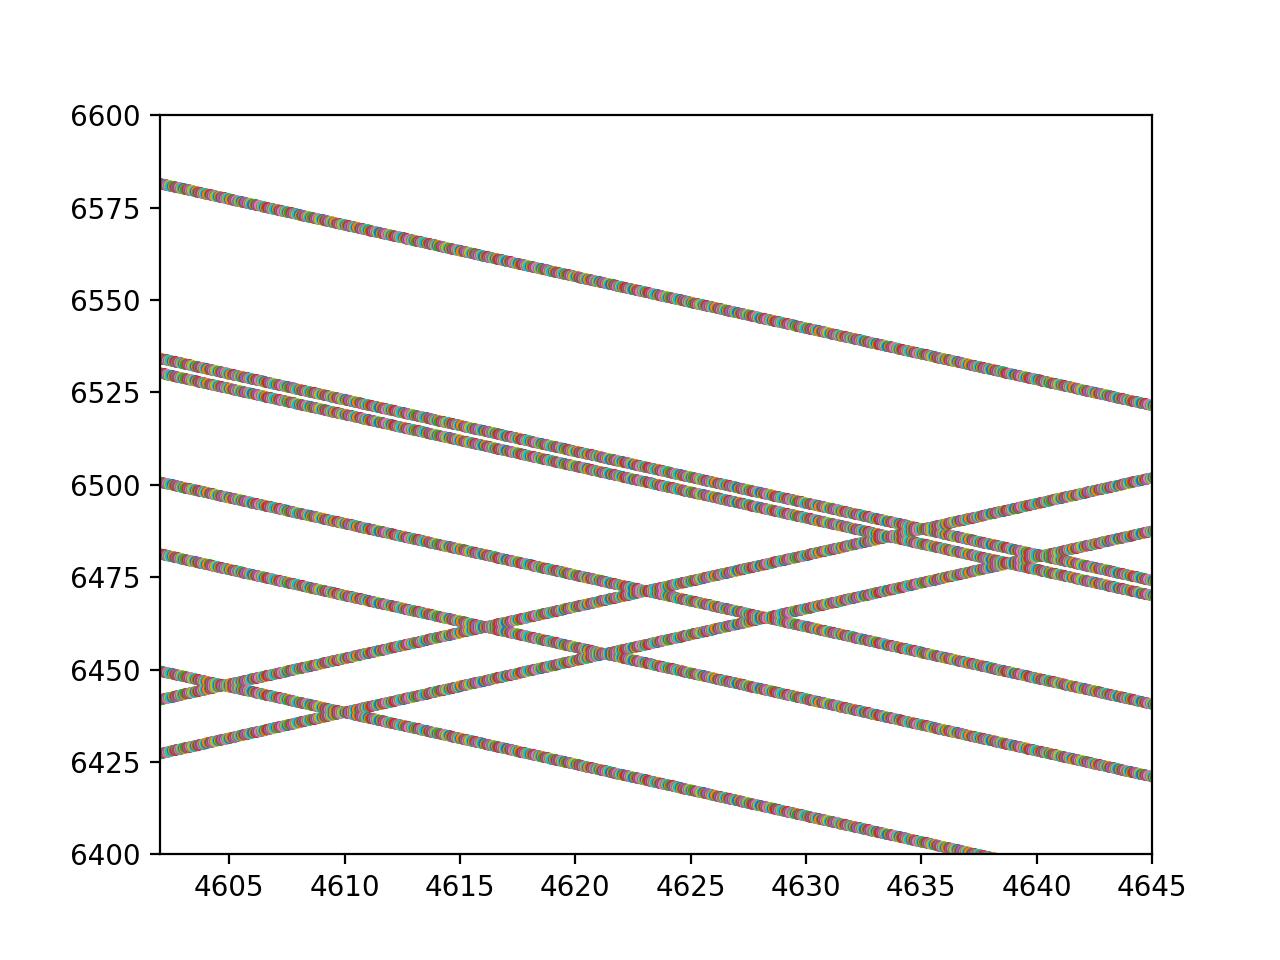

(6400.0, 6600.0)

In [13]:
%matplotlib notebook
import matplotlib.pyplot as plt
for i in range(len(B_list)):
    elevels=toWrite[1:len(myStates)+1,i]
    BB=elevels*0+B_list[i]
    plt.plot(BB,elevels,'.')
plt.xlim([4602, 4645])
plt.ylim([6400,6600])
#plt.savefig("myimg.svg")

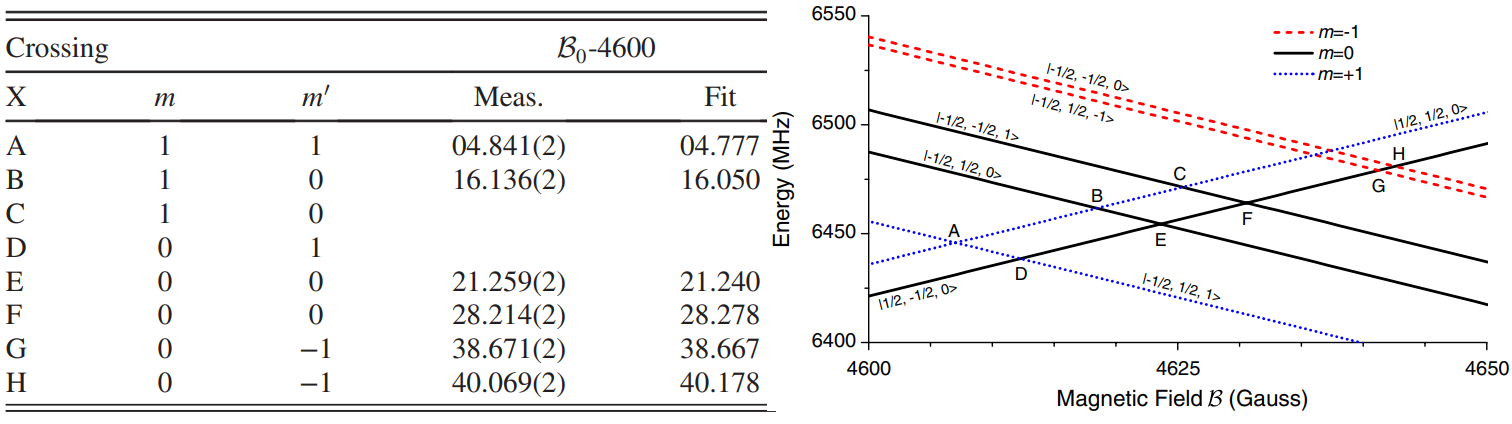

Shorthand notations:
$$
[a] = \sqrt{2a+1}\\
\{a\} = \sqrt{a(a+1)(2a+1)}
$$

Transformation from Hund's case $b_{\beta S}$ to Hund's case $b_{\beta J}$
$$\scriptsize
|SI_1GNF_1I_2F\rangle = \sum_{J=S+N} [JG] (-1)^{G+S+I_1} 
\left\{\begin{matrix} F_1&G&N\cr S&J&I_1 \end{matrix}\right\}
|NSJI_1F_1I_2F\rangle
$$

State representations
$$ \scriptsize
\psi = |\eta\Lambda; SI_1GNF_1I_2F\rangle; 
\psi' = |\eta\Lambda; SI_1G'N'F'_1I_2F'\rangle
$$

The same representation may be used with $^{138}$BaF calculations too --- even thought the ground state is best described in Hund's case $b_{\beta J}$. In that case $G = S$ (since $I_1 = 0$), and $F_1 = S+N$ becomes $J$ (with the order of coupling of S and N reversed than the usual Hund's case $b_{\beta J}$; this would introduce sign reversals --- due to convention of the definition of CG coefficients--- in some state representation, but should not affect the energy eigenvalue computation!)


Matrix elements
1. 
$$\scriptsize
\langle\psi|H_N|\psi'\rangle = \delta_{FF'}\delta_{F_1F'_1}\delta_{NN'}\delta_{GG'}(B_N N(N+1) - D_N[N(N+1)]^2)
$$

2. 
$$\scriptsize
\langle\psi|H_{NS}|\psi'\rangle = \gamma \delta_{FF'}\delta_{F_1F'_1}\delta_{NN'} \{NS\} [GG'] (-1)^{F_1+I_1+N+S+1+G'+G'} \left\{\begin{matrix} N'&G'&F_1\cr G&N&1 \end{matrix}\right\}
\left\{\begin{matrix} S&G'&I_1\cr G&S&1 \end{matrix}\right\}
$$

3. 
$$\scriptsize
\langle\psi|H_F^{(Ba)}|\psi'\rangle =\delta_{FF'}\delta_{F_1F'_1}\delta_{NN'}\delta_{GG'} \dfrac{b_F^{(Ba)}}{2}  \left(G(G+1)-S(S+1)-I_1(I_1+1)\right) 
$$

4.
$$\scriptsize
\langle\psi|H_c^{(Ba)}|\psi'\rangle = -\delta_{FF'}\delta_{F_1F'_1} c^{(Ba)}\dfrac{\sqrt{30}}{3}\{I_1S\} [GG'NN']
\left(\begin{matrix} N&2&N'\cr 0&0&0 \end{matrix}\right)\\
\sum_{J,J'} (-1)^{G+G'+S+S+I_1+I_1+J'+F_1+I_1+N}[JJ']^2
\left\{\begin{matrix} F_1&G&N\cr S&J&I_1 \end{matrix}\right\}
\left\{\begin{matrix} F_1'&G'&N'\cr S&J'&I_1 \end{matrix}\right\}
\left\{\begin{matrix} I_1&J'&F_1\cr J&I_1&1 \end{matrix}\right\}
\left\{\begin{matrix} J&J'&1\cr N&N'&2\cr S&S&1 \end{matrix}\right\}
$$

5.
$$\scriptsize
\langle\psi|H_Q|\psi'\rangle = \delta_{FF'}\delta_{F_1F'_1} \dfrac{eq_0Q}{4} [GG'NN']
\left(\begin{matrix} N&2&N'\cr 0&0&0 \end{matrix}\right)
\left(\begin{matrix} I_1&2&I_1\cr -I_1&0&I_1 \end{matrix}\right)^{-1}\\
\sum_{J,J'} (-1)^{G+G'+S+I_1+S+I_1+J'+F_1+I_1+S+J'}[JJ']^2
\left\{\begin{matrix}F_1&G&N\cr S&J&I_1 \end{matrix}\right\}
\left\{\begin{matrix}F_1'&G'&N'\cr S&J'&I_1 \end{matrix}\right\}
\left\{\begin{matrix}I_1&J'&F_1\cr J&I_1&2 \end{matrix}\right\}
\left\{\begin{matrix}N'&J'&S\cr J&N&2 \end{matrix}\right\}
$$

6.
$$\scriptsize
\langle\psi|H_F^{(F)}|\psi'\rangle = \delta_{FF'}\delta_{NN'} (-1)^{F+I_2+N+G+G'+I_1+S+F'_1+F'_1}[GG'F_1F_1'] \{SI_2\}
\left\{\begin{matrix} I_2&F_1'&F\cr F_1&I_2&1 \end{matrix}\right\}
\left\{\begin{matrix}G'&F_1'&N\cr F_1&G&1 \end{matrix}\right\}
\left\{\begin{matrix}S&G'&I_1\cr G&S&1 \end{matrix}\right\}
$$

7.
$$\scriptsize
\langle\psi|H_c^{(F)}|\psi'\rangle = -\delta_{FF'} c^{(F)}\dfrac{\sqrt{30}}{3}\{I_2S\} [GG'NN'F_1F_1']
\left(\begin{matrix} N&2&N'\cr 0&0&0 \end{matrix}\right)
\sum_{J,J'} (-1)^{G+G'+S+S+I_1+I_1+F_1'+F_1'+F+I_2+I_1+1+N+J}[JJ']^2
\left\{\begin{matrix} F_1&G&N\cr S&J&I_1 \end{matrix}\right\}
\left\{\begin{matrix} F_1'&G'&N'\cr S&J'&I_1 \end{matrix}\right\}
\left\{\begin{matrix} I_2&F_1'&F\cr F_1&I_2&1 \end{matrix}\right\}
\left\{\begin{matrix} J'&F_1'&I_1\cr F_1&J&1 \end{matrix}\right\}
\left\{\begin{matrix} J&J'&1\cr N&N'&2\cr S&S&1 \end{matrix}\right\}
$$

So far the magnetic sublevels ($m_F$s) had been ignored, as they contribute nothing to energy in absence of magnetic field.

8.
$$\scriptsize
\langle\psi|H_S^Z|\psi'\rangle = g_S \mu_B (-1)^{F-m_F}
\left(\begin{matrix} F&1&F'\cr -m_F&0&m_{F'} \end{matrix}\right)
(-1)^{F'+I_2+F_1+1} [FF'F_1F'_1GG'] \\
(-1)^{F'_1+N+G+1} \delta_{NN'}
\left\{\begin{matrix} F'_1&F'&I_2\cr F&F_1&1 \end{matrix}\right\}
\left\{\begin{matrix} G'&F'_1&N\cr F_1&G&1 \end{matrix}\right\}
(-1)^{G'+I_1+S+1}
\left\{\begin{matrix} S&G'&I_1\cr G&S&1 \end{matrix}\right\}
\{S\}
$$

9.
$$\scriptsize
\langle\psi|H_{I_1}^Z|\psi'\rangle = -g_{I_1} \mu_N (-1)^{F-m_F}
\left(\begin{matrix} F&1&F'\cr -m_F&0&m_{F'} \end{matrix}\right)
(-1)^{F'+I_2+F_1+1} [FF'F_1F'_1GG']\\
(-1)^{F'_1+N+G+1} \delta_{NN'}
\left\{\begin{matrix} F'_1&F'&I_2\cr F&F_1&1 \end{matrix}\right\}
\left\{\begin{matrix} G'&F'_1&N\cr F_1&G&1 \end{matrix}\right\}
(-1)^{G+I_1+S+1}
\left\{\begin{matrix} I_1&G'&S\cr G&I_1&1 \end{matrix}\right\}
\{I_1\}
$$

10.
$$\scriptsize
\langle\psi|H_{I_2}^Z|\psi'\rangle = -g_{I_2} \mu_N (-1)^{F-m_F}
\left(\begin{matrix} F&1&F'\cr -m_F&0&m_{F'} \end{matrix}\right)
(-1)^{F+I_2+F_1+1} [FF']\delta_{F_1F_1'}\delta_{NN'}\delta{GG'}
\left\{\begin{matrix} I_2&F'&F_1\cr F&I_2&1 \end{matrix}\right\}
\{I_2\}
$$

11.
$$\scriptsize
\langle\psi|H_{N}^Z|\psi'\rangle = -g_{\rm rot} \mu_N (-1)^{F-m_F}
\left(\begin{matrix} F&1&F'\cr -m_F&0&m_{F'} \end{matrix}\right)
(-1)^{F'+I_2+F_1+1} [FF'F_1F'_1] 
(-1)^{F_1+N'+G+1}
\left\{\begin{matrix} F'_1&F'&I_2\cr F&F_1&1 \end{matrix}\right\}
\delta_{GG'}
\left\{\begin{matrix} N'&F'_1&G\cr F_1&N&1 \end{matrix}\right\}
\delta_{NN'} \{N\}
$$

12.
$$\scriptsize
\langle\psi|H_{g_l}^Z|\psi'\rangle = \sum_{J,J'}\sum_{\Sigma,\Sigma'}\sum_{q = \pm1} g_l \mu_B (-1)^{G+G'+S+I_1+S+I_1}
\left\{\begin{matrix} F_1&G&N\cr S&J&I_1 \end{matrix}\right\}
\left\{\begin{matrix} F_1'&G'&N'\cr S&J'&I_1 \end{matrix}\right\}
[JJ']^2 \\
[GG'NN'] 
(-1)^{N-S+N'-S+\Sigma+\Sigma'}
\left(\begin{matrix} J&S&N\cr \Sigma&-\Sigma&0 \end{matrix}\right)
\left(\begin{matrix} J'&S&N'\cr \Sigma'&-\Sigma'&0 \end{matrix}\right) 
(-1)^{F-m_F}
\left(\begin{matrix} F&1&F'\cr -m_F&0&m_{F'} \end{matrix}\right)\\
(-1)^{F'+I_2+F_1+1} [FF'F_1F'_1] (-1)^{F'_1+J+I_1+1}
\left\{\begin{matrix} F'_1&F'&I_2\cr F&F_1&1 \end{matrix}\right\}
\left\{\begin{matrix} J'&F'_1&I_1\cr F_1&J&1 \end{matrix}\right\}
(-1)^{J+S-2\Sigma}
\left(\begin{matrix} J&1&J'\cr -\Sigma&q&\Sigma' \end{matrix}\right)
\left(\begin{matrix} S&1&S \cr -\Sigma&q&\Sigma' \end{matrix}\right)
\{S\}
$$

In [53]:
res = [-1,2,-45]

In [54]:
for n,i in enumerate(res):
    if n!= len(res)-1 and np.sign(res[n+1]) == -1:
        print("negative coming next!")
    print(n)
    print(i)

0
-1
negative coming next!
1
2
2
-45


In [56]:
np.sign(res[1+1])

-1